# Image classification

![classification](https://cdn-images-1.medium.com/max/1600/1*XdCMCaHPt-pqtEibUfAnNw.png =600x)


## Essential imports

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

## Initialize some parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28,28

## Import MNIST dataset
Dataset consist of 60,000 28x28 grayscale images of handwritten digits along with 10,000 test images

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Check channel_first

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

## Normalize images

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## Display training images

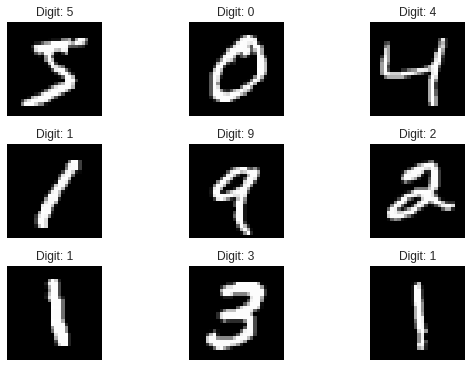

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i,:,:,0], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

##  Convert class vectors to binary class matrices

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build network

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Loss & Optimizer

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

## Train network

In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.2669 - acc: 0.9184 - val_loss: 0.0562 - val_acc: 0.9826
Epoch 2/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.0894 - acc: 0.9733 - val_loss: 0.0440 - val_acc: 0.9863
Epoch 3/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.0673 - acc: 0.9794 - val_loss: 0.0342 - val_acc: 0.9887
Epoch 4/30
60000/60000 [==============================] - 9s 154us/step - loss: 0.0550 - acc: 0.9836 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 5/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0327 - val_acc: 0.9893
Epoch 6/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0316 - val_acc: 0.9898
Epoch 7/30
60000/60000 [==============================] - 9s 152us/step - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0301 -

## Test our model

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031408713802253393
Test accuracy: 0.9925


# Exercise for you

Design a image classifier for cifar10 dataset. Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

Use the same above code and modify to this problem.

![cifar10](https://samyzaf.com/ML/cifar10/cifar1.jpg)

## Tips


*   Train size: `50000x32x32x3`
*   Test size: `10000x32x32x3`
* Input size: `32x32x3`




In [0]:
# Load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 55s 0us/step


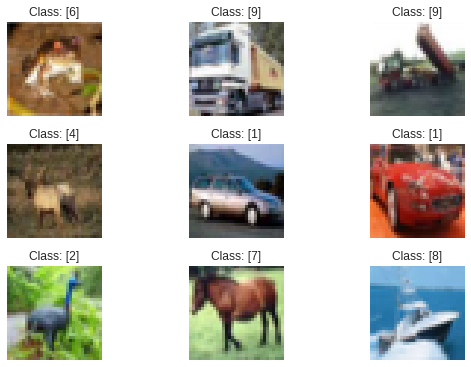

In [0]:
# display dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i,:,:,:], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])